## IRIS classification sample

very simple Iris sample using keras

- dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set
- source reference: https://medium.com/@luwei.io/logistic-regression-with-keras-d75d640d175e

This sample demonstrates:

- basics of keras mechanism
- how to load dataset (csv file into numpy)
- visualization of dataset

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

from keras.utils.np_utils import to_categorical 
from keras import backend as K
import matplotlib.pyplot as plt

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Data preparation

In [2]:
label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris_data = np.genfromtxt('./assets/iris/iris.csv', delimiter=',')
    
print(type(iris_data), iris_data.shape)
print(iris_data[0])
x_train = iris_data[:,:4]
print(x_train.shape, x_train[0])
yo_train = iris_data[:,4:]
print(yo_train.shape, yo_train[0], label[int(yo_train[0])])

# convert to OHE format
y_train = to_categorical(yo_train, num_classes=len(label))

print(y_train[0])

<class 'numpy.ndarray'> (150, 5)
[5.1 3.5 1.4 0.2 0. ]
(150, 4) [5.1 3.5 1.4 0.2]
(150, 1) [0.] Iris-setosa
[1. 0. 0.]


### Train


In [3]:
K.clear_session()

input_dim = 4
out_dim = len(label)

model = Sequential()
model.add(Dense(out_dim,
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=input_dim))


In [4]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100) # epochs = 500

Epoch 1/100
150/150 [==============================] - 5s 31ms/step - loss: 1.8126 - acc: 0.5733
Epoch 2/100
150/150 [==============================] - 0s 88us/step - loss: 1.2140 - acc: 0.6667
Epoch 3/100
150/150 [==============================] - 0s 119us/step - loss: 0.9475 - acc: 0.6667
Epoch 4/100
150/150 [==============================] - 0s 84us/step - loss: 0.8660 - acc: 0.8400
Epoch 5/100
150/150 [==============================] - 0s 82us/step - loss: 0.8489 - acc: 0.9000
Epoch 6/100
150/150 [==============================] - 0s 75us/step - loss: 0.8374 - acc: 0.9400
Epoch 7/100
150/150 [==============================] - 0s 83us/step - loss: 0.8337 - acc: 0.9200
Epoch 8/100
150/150 [==============================] - 0s 195us/step - loss: 0.8287 - acc: 0.9267
Epoch 9/100
150/150 [==============================] - 0s 86us/step - loss: 0.8234 - acc: 0.9200
Epoch 10/100
150/150 [==============================] - 0s 78us/step - loss: 0.8212 - acc: 0.9067
Epoch 11/100
150/150 [=====

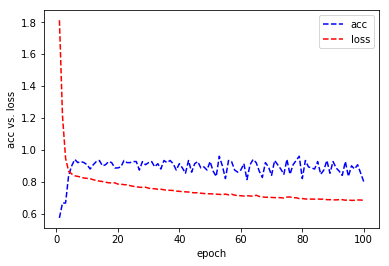

In [5]:
# Get training and test loss histories
loss = history.history['loss']
acc = history.history['acc']
# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, acc, 'b--')
plt.plot(epoch_count, loss, 'r--')
plt.legend(['acc', 'loss'])
plt.xlabel('epoch')
plt.ylabel('acc vs. loss')
plt.show()

### Predict

In [6]:
idx = 50
test = x_train[idx]
val = yo_train[idx]
print(test, val)

[7.  3.2 4.7 1.4] [1.]


In [7]:
x = np.expand_dims(test, axis=0)
y = model.predict(x)
predict = np.argmax(y)
print(predict, label[predict])

1 Iris-versicolor


### Plot

Data visualization

https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation

In [8]:
import sys
import numpy
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [9]:
url='./assets/iris/iris-plot.csv'
dataset = pandas.read_csv(url)

In [10]:
print(dataset.head(10))

   id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [11]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
setosa=dataset[dataset['Species']=='Iris-setosa']
versicolor =dataset[dataset['Species']=='Iris-versicolor']
virginica =dataset[dataset['Species']=='Iris-virginica']

In [13]:
print(dataset.describe())

               id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


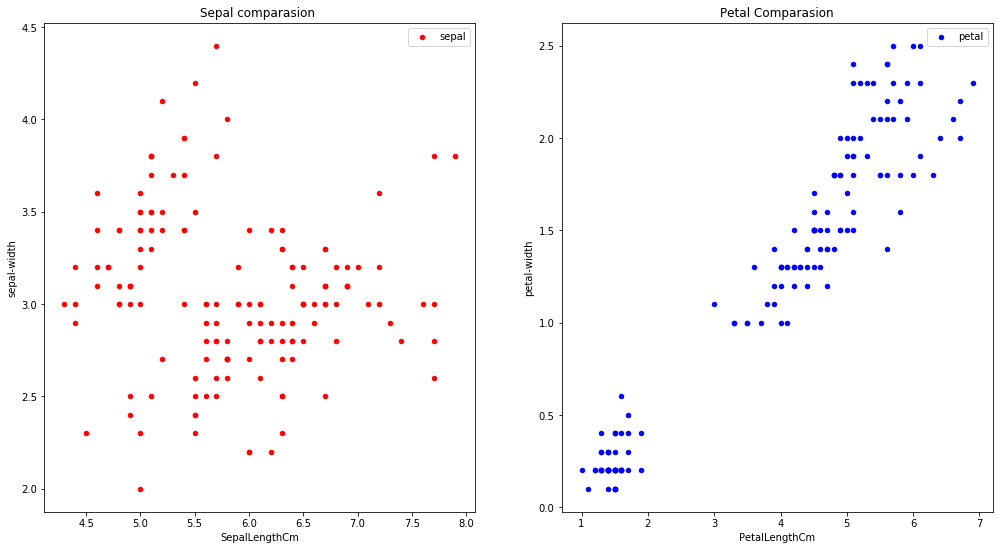

In [14]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
dataset.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
dataset.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

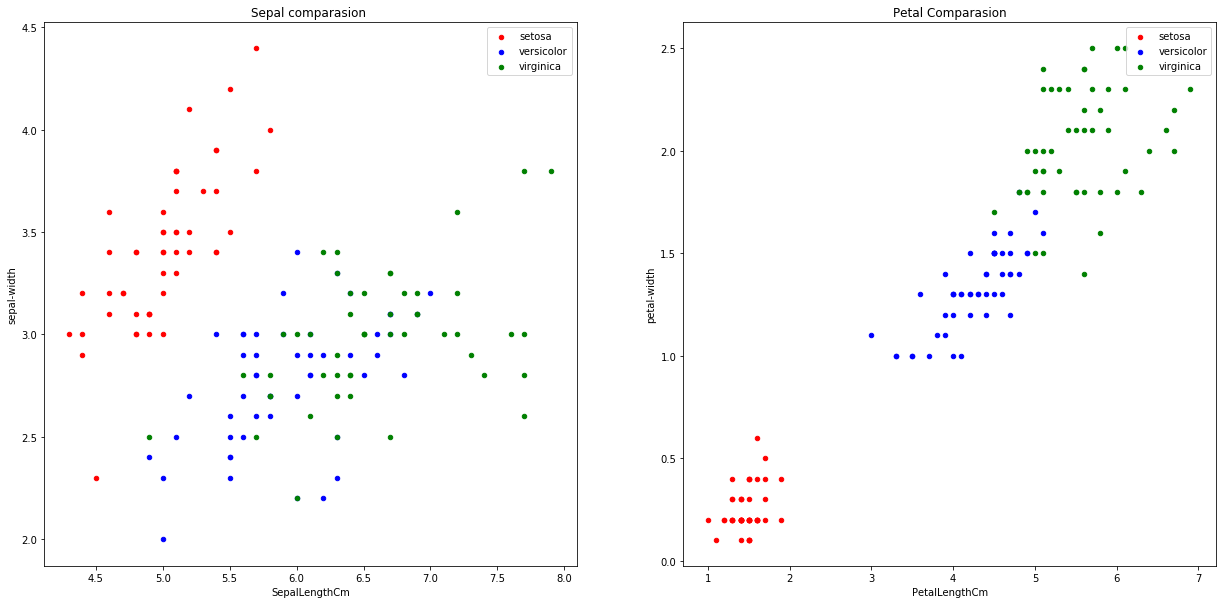

In [15]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()